# TensorFlow基础知识及编程框架

## 一、实验目的

<p>1.理解TenosrFlow的基本概念</p>
<p>2.熟悉TensorFlow的数据类型、基本运算和基础函数</p>
<p>3.掌握TensorFlow的符号式编程框架</p>
<p>4.理解神经元模型及实现</p>

## 二、实验环境

<p>程序语言：Python3.6</p>
<p>相关包：tensorflow、matplotlib</p>

## 三、实验原理

### 3.1 符号式编程

<p style="text-indent:2em">编程模式通常分为命令式编程（imperative style programming）和符号式编程（symbolic style programming）。命令式编程就是编写我们理解的通常意义上的程序，很容易理解和调试，按照原有逻辑执行。符号式计算一般是先定义各种变量，然后建立一个数据流图，在数据流图中规定各个变量之间的计算关系，最后需要对数据流图进行编译，但此时的数据流图还是一个空壳儿，里面没有任何实际数据，只有把需要运算的输入放进去后，才能在整个模型中形成数据流，从而形成输出值。**因此，整体编程过程分为了构建阶段和运行阶段两个部分。**符号式编程涉及很多的嵌入和优化，不容易理解和调试，但运行速度相对有所提升。现有的深度学习框架中，Torch 是典型的命令式的，Caffe、MXNet 采用了两种编程模式混合的方法，而TensorFlow 完全采用符号式编程。</p>

### 3.2 神经元模型

<p style="text-indent:2em">神经元是神经网络的结构基础，参考人的神经元，其模型如下图所示：</p>
<p>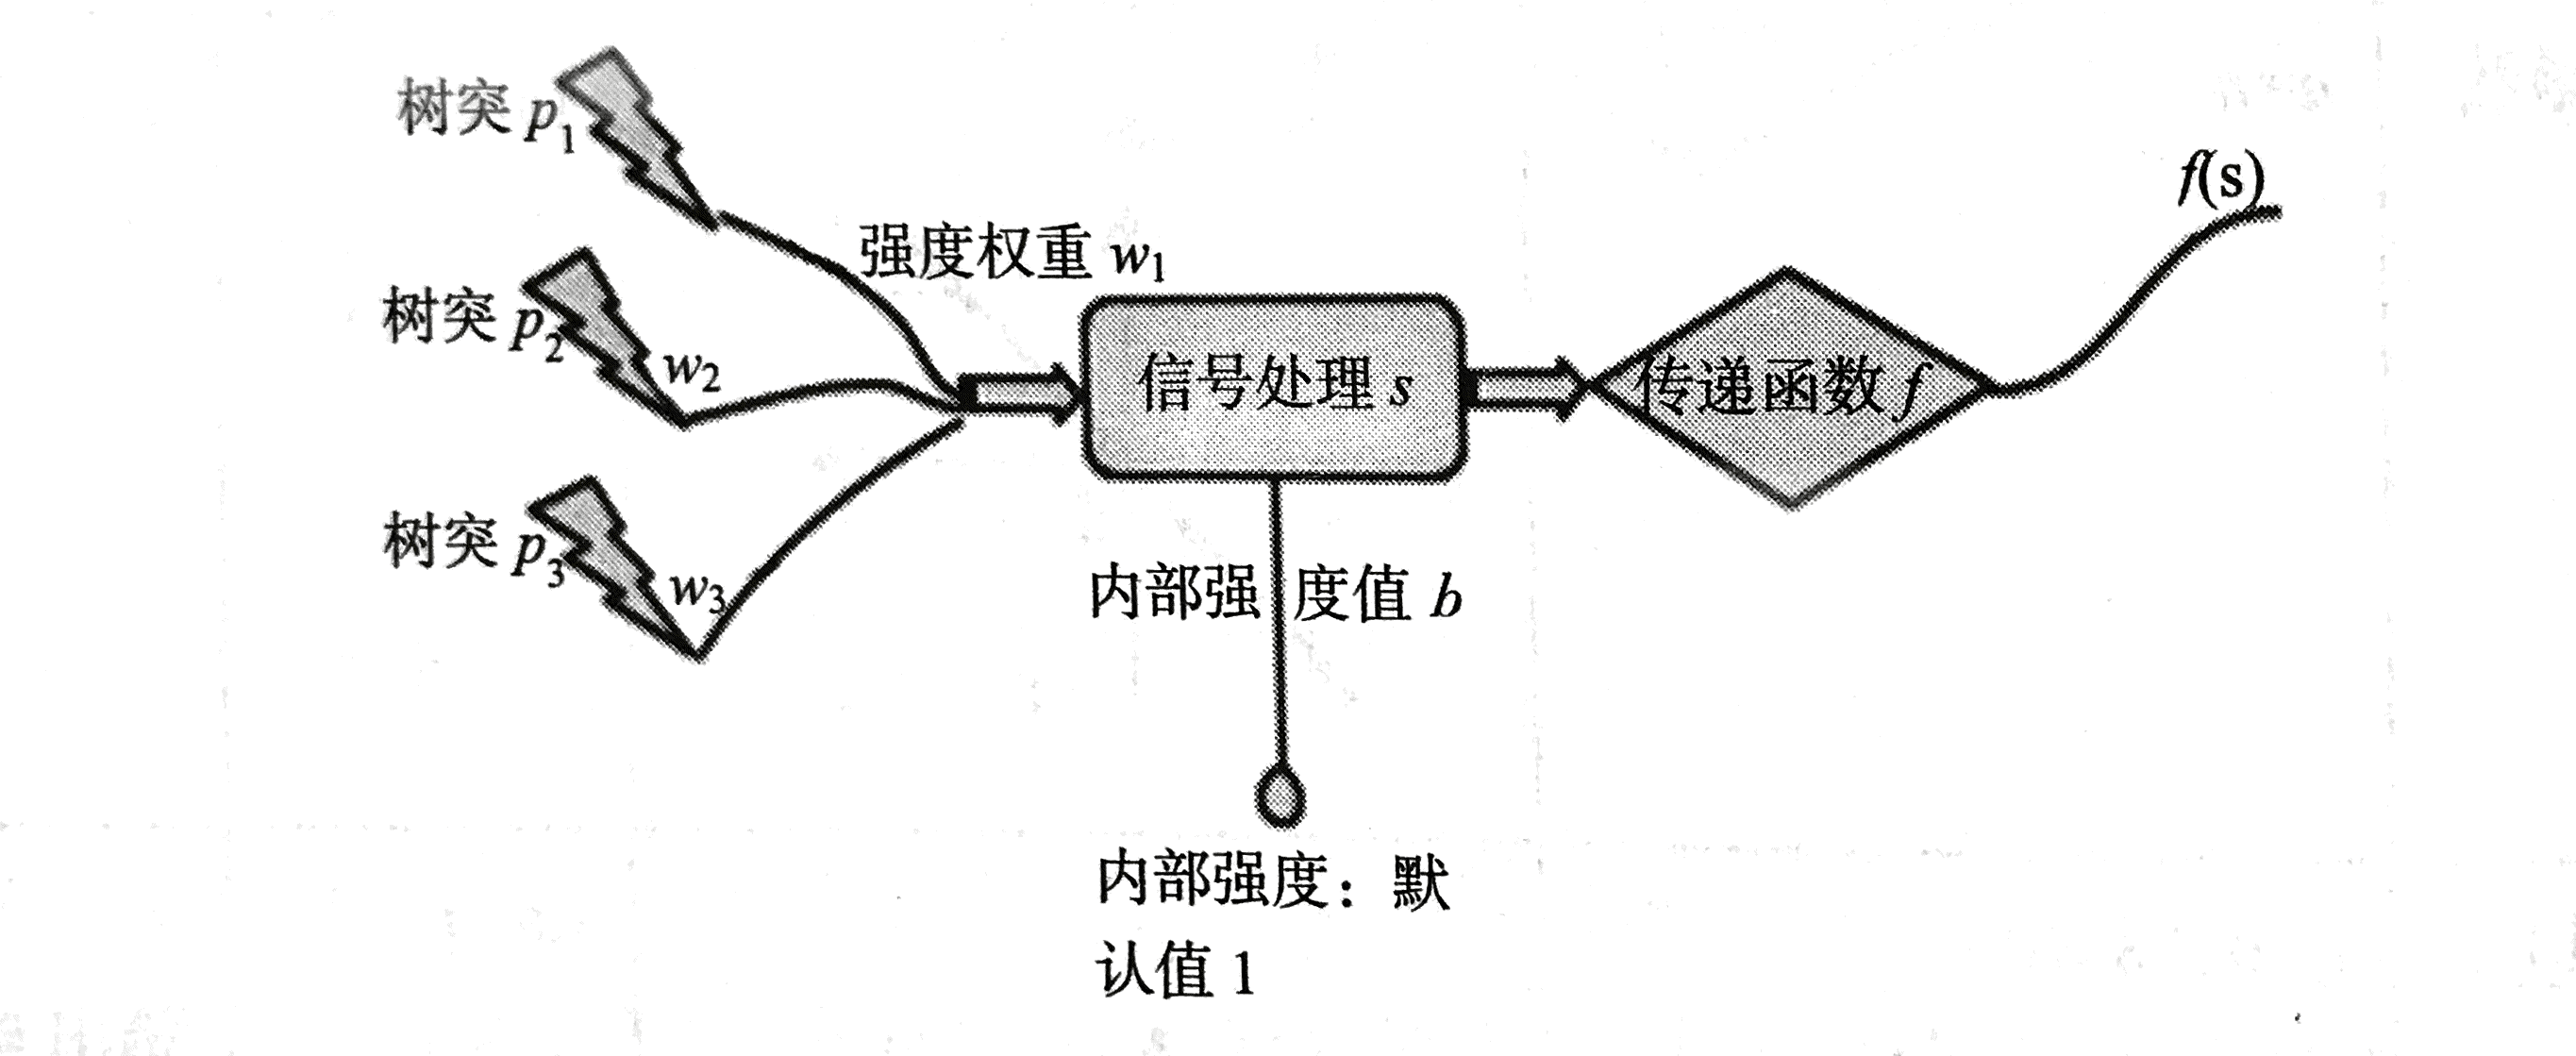</p>
<p style="text-indent:2em">这个图表示的是传递过来的各种信号值，会由对应的强度权重决定其刺激程度，再加上当前神经元的内部强度，合成获得信号结果，在通过传递函数（激活函数）来决定当前是否产生刺激</p>
<p style="text-indent:2em">公式表示即为:</p>
<p style="text-indent:2em">${\color{Blue}y}={\color{Green}f}(X*W+b)$</p>
<p style="text-indent:2em">$X$为输入信号，$W$为输入信号强度权重，$b$为神经元内部强度，${\color{Green}f}$为激活函数，${\color{Blue}y}$为最终信号</p>

## 四、实验内容

### 4.1 构建阶段

<p style="text-indent:2em">首先我们来认识构建阶段的过程和相关的Graph，Tensor，Operation和Variable四个基本概念，并观察对应的可视化效果。</p>

#### 4.1.1 Graph(图） 

<p style = "text-indent:2em">Graph即为数据流图，或称之为计算图，初始为空，在构建过程中，随着各种TensorFlow函数的调用而由系统负责将相关信息添加到Graph中，在这个图中，将会展现数据的流动的方向以及它们之间相互转化时所要执行的转换操作，可通过Graph对象来对其进行访问。任何一个TensorFlow程序都至少包含一个Graph对象，如果包含多个Graph对象，它们之间并不会共享数据和运算，多Graph程序已超出本课程中的授课范围，有兴趣的同学可以自学。总之，TensorFlow是一个通过计算图的形式来表述计算的编程系统。</p>


<p style = "text-indent:2em">输入下列代码，首先导入tensorflow库，编译器会在这一过程中构建一个默认的Graph对象，大多数程序仅依赖于默认图，后面的构建信息都将添加到此对象中，如果对自己的构建过程有疑问，想要查看当前Graph的构建情况，tf.get_default_graph()函数可以获取该对象。</p>

In [1]:
import tensorflow as tf

<p style="text-indent:2em">将tensorflow简化为tf，便于后面对TensorFlow库中方法的调用。 </p>

#### 4.1.2 Tensor（张量）与Operation（操作）

<p style="text-indent:2em">Tensor和Operation是Graph的主要组成部分，Tensor是值的引用，Operation是运算的引用，每一个Operation都是Graph的一个节点，每个Tensor为Graph为一条边。TensorFlow函数一般都会至少在Graph里添加一个Operation节点，关联一个或几个Tensor边作为输入，并对应产生一个或几个输出Tensor边，最终整个程序中的节点和边关联在一起构成Graph。当然函数也有可能无输入或无输出，甚至可能对Graph无影响。
<p style="text-indent:2em">输入下一段代码后，观察其运行结果</p>

In [2]:
hello = tf.constant('Hello World!')
print("hello:",hello)

hello: Tensor("Const:0", shape=(), dtype=string)


#####  (1) Tensor

<p style="text-indent:2em">Tensor是TensorFlow中很重要的概念，张量本身的含义，可以简单的理解为是多维数组，零阶张量为标量，也就是一个数，一阶张量为向量（vector），也就是一维数组，二阶张量为二维数组，以此类推。TensorFlow 程序使用Tensor对象作为数据单位来引用运行所需的数据，每创建一个Tensor对象就会在Graph中新添加一条边。但是需要注意，Tensor对象在TensorFlow中并没有直接保存数据，而只是计算结果的句柄。而如何获取张量值，将在后面的<a href="#(2)-tf.Session.run()-方法">4.2.1(2)</a>中具体说明。</p>

<p style="text-indent:2em">从运行结果我们可以看到，其输出不是hello所存储的字符串值，而是hello对应的Tensor对象描述。</p>
<p style="text-indent:2em">Tensor对象有三个主要属性，分别为名字(name)、形状(shape)和数据类型(dtype)，对应输出结果中Tensor后面的三个参数。</p><ul><ul><li>名字是Graph中的该Tensor对象唯一标识，形式为"&lt;OP_NAME&gt; : &lt;i&gt;"，其中："&lt;OP_NAME&gt;" 是生成该张量的操作的名称。"&lt;i&gt;" 是一个整数，表示该张量在操作的输出中的索引，对于这部分的深入理解我们会在<a href="#(3)-Operation（算子）">4.2.2(3)</a>中结合operation进行说明。</li><li>形状即为Tensor的所引用的数据的维度及各维度大小，在本例中输出结果为()，则表明输入数据为标量。</li><li>数据类型即为所引用的数据值的数据类型，一个Tensor只能有一种数据类型。</li></ul></ul><p style="text-indent:2em">这三个属性值，可以利用Tensor对象的name，shape和dtype访问属性来获取。除此之外，Tensor对象还有Graph属性，op属性，分别用来获取包含当前Tensor对象的Graph引用和产生该Tensor的直接operation名。（注意：本课程只会根据需要对TensorFlow的相关函数和类进行逐步地选择性介绍，其他内容请通过[TensorFlow API文档](https://www.tensorflow.org/api_docs/python)自学）</p>

##### (2) tf.constant()函数与Constant Tensor（静态张量）

<p style = "text-indent:2em">constant函数用于创建Constant Tensor对象，静态张量即表示在程序运行过程中，Tensor所引用的值将始终保持不变，与其相反的是Variable（变量）对象，将在后面的<a href="#4.1.3-Variable（变量）">4.1.3</a>具体说明。要注意的是，调用tensorflow的函数，其运行实质往往是用于构建Graph的操作，而不是执行运算产生运行结果，返回的也不是运行结果的值，而是这个操作的结果的引用，赋值语句起到的作用是把某个变量名和其对应起来。</p>
<p style = "text-indent:2em">函数原型如下：</p>
```
tf.constant(value, dtype=None, shape=None, name='Const', verify_shape=False)
```
<p style = "text-indent:2em">第一个参数value为对应静态常量值，后面三个则为所产生的Tensor的对应属性相关，dtype和shape如果没有实参的话，则编译器自动根据value实参值进行确定，dtype实参值可以为[表1](#table1)中的Python类型中的任何一个，shape实参值应该是一个整形数组[x1,x2,…,xn]，其中n为维度（或阶数），xi为第i维的长度。name如果有冲突的话，会通过添加序号的方式解决命名冲突，这个值要注意。verify_shape是设置常量的形状是否可以被更改,默认不可更改</p>
<a id="table1"></a>
<p>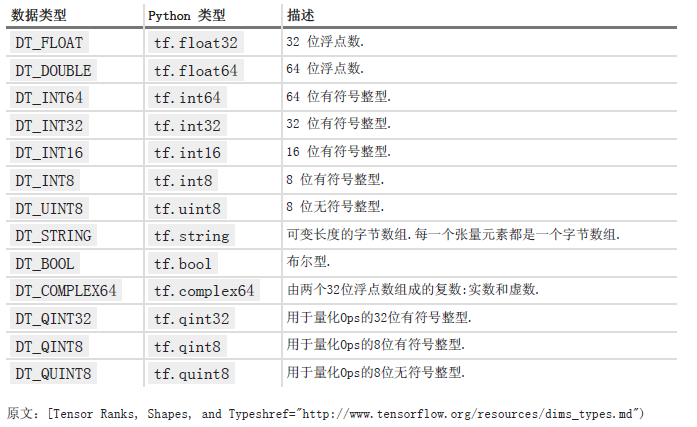
</p>
<center>表1 Tensor数据类型</center>

##### (3) Operation（算子）

<p style="text-indent:2em">算子（operation，OP），对应一种操作，一般用来表示施加的数学运算，也可以表示数据输入（feed in）的起点以及输出（push out）的终点，或者是读取/写入持久变量（persistent variable）的终点。每一个算子都会在Graph中对应一个节点，该算子根据运算本质关联输入和输出Tensor边，对应的，一个Tensor边可能是a算子的输出和b算子的输入，因此把a和b两个算子关联起来，这种关联关系构建出了整个Graph。<p>
<p style="text-indent:2em">再输入下列两组代码，观察结果</p>

In [3]:
val_a = tf.constant([[1,2,3],[4,5,6]])
print("val_a:",val_a)
val_b = tf.constant([[1,1,1],[2,2,2]])
print("val_b:",val_b)
print("operations before adds:",tf.get_default_graph().get_operations())

val_a: Tensor("Const_1:0", shape=(2, 3), dtype=int32)
val_b: Tensor("Const_2:0", shape=(2, 3), dtype=int32)
operations before adds: [<tf.Operation 'Const' type=Const>, <tf.Operation 'Const_1' type=Const>, <tf.Operation 'Const_2' type=Const>]


In [4]:
val_c1 = tf.add(val_a, val_b)
val_c2 = val_a + val_b
print("val_c1:",val_c1, "val_c2:", val_c2)
print("operations after adds:",tf.get_default_graph().get_operations())

val_c1: Tensor("Add:0", shape=(2, 3), dtype=int32) val_c2: Tensor("add:0", shape=(2, 3), dtype=int32)
operations after adds: [<tf.Operation 'Const' type=Const>, <tf.Operation 'Const_1' type=Const>, <tf.Operation 'Const_2' type=Const>, <tf.Operation 'Add' type=Add>, <tf.Operation 'add' type=Add>]


<p style="text-indent:2em">通过上两段代码的执行结果，我们不仅进一步认识了Tensor对象的三个属性，观察到命名冲突的解决方案，还对Operation对象有了进一步的认识，这个对象有两个主要属性，一个是name，一个是type，name是Graph中该对象的唯一标识，type表明当前的算子类型，[表2](#table2)列举了一些TensorFlow 中的算子类型。</p>
<p style="text-indent:2em">这个时候我们再理解Tensor中的名字部分的意义，根据上面讲解的一个Tensor会作为某个操作的输出，与对应的operation关联起来，所以名字的前半部分即对应的是operation名字，而后半部分的索引值，即把当前张量作为输出的操作，运行后如果只有这唯一的结果输出，该值为0，若操作会产生多个值的时候，这个值就会说明当前Tensor对象是第几个输出。</p>
<p style="text-indent:2em">Graph对象的get_operations()的方法能够获取当前Graph对象的全部运算，我们可以看到到目前为止所有的operation对象，而这个方法的调用对Graph无任何影响。但要注意，在kernel重新运行之前，notebook中的代码块的每一次运行都产生了新的对应的运行结果，而不是刷新原有的代码运行，因此，顺序执行下来，我们发现当前的operations是所有执行了运行命令的代码块的全部数据，而不是仅仅是本代码段的执行结果。</p>
<a id="table2"></a>
<p>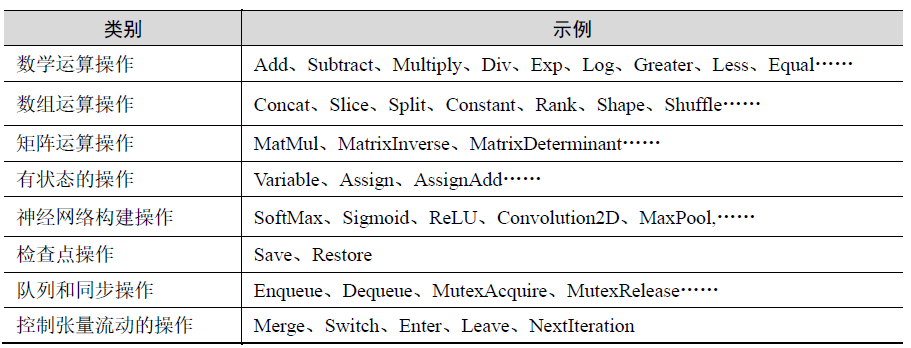</p>
<center>表2 TensorFlow部分算子</center>
<p style="text-indent:2em">到目前为止代码中的运算关系比较简单，所以在刚才的代码后，[图1](#graph1)即为对应Graph示例图，我们会在本节的<a href="#(5)-可视化理解Graph、Tensor、Operation">(5)</a>部分对其进行详细解释。</p>
<a id = "graph1"></a>
<p>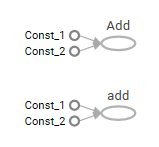
</p>
<center>图1 Graph对象可视化结果</center>


##### (4) tf.add函数与“+”运算符

* add函数：
<p>函数原型：
    <code>tf.add(x,y,name=None)</code>
</p>
<p>add函数将在Graph中添加加法运算的算子，并返回结果Tensor引用。参数列表中的x和y是关联加法运算的两个Tensor，要求数据类型必须是half, float32, float64, uint8, int8, int16, int32, int64, complex64, complex128, string，且x和y的数据类型和形状要一致。name是对当前的算子重新命名，否则为Add。</p>
* "+"运算符:
<p>TensorFlow对常见数学运算符进行了重载，可以直接利用数学运算符构建Tensor转换关系，会有一个TensorFlow OP被调用，并被添加到数据流图中。“+”运算符实际上也是调用了tf.add函数，只是name设置为add。</p>

##### (5) 可视化理解Graph、Tensor、Operation


<p style="text-indent:2em">[图1](#graph1)是从TensorFlow本身的可视化插件生成的Graph截取的，因此该示例图与实际效果一致，可视化插件的使用方法会在后面实验<span style="color:red">？</span>进行介绍，现在我们先利用[图1](#graph1)理解节点和边，Tensor与Operation的关系，以及计算图的概念。圆圈和椭圆都是Operation，也是计算图中的节点，圆圈是Const算子的固定表示符号，椭圆是一般算子的表示符号。这里我们会发现，圆圈的旁边分别标为Const_1和Const_2，即算子的名字，正是constant函数中对应的name值。有向边对应的是Tensor对象，其名字并没有标注，因为通过刚才对Tensor的理解我们发现该name值是由算子决定，但是Const_1的输出边的Tensor可通过val_a来对其进行引用访问，Const_2的输出边的Tensor可通过val_b来对其进行访问，而Add和add算子的输入正是val_a和val_b的Tensor值,即Const_1和Const_2的数据将流入Add和add算子后，再产生新的Tensor。</p>

#### 4.1.3 Variable（变量）


<p style="text-indent:2em">Variable是TensorFlow神经网络模型中很重要的数据类型，主要用于存储神经网络中待优化的各种参数，因为优化过程是迭代逼近的过程，所以需要长期存在，并允许通过操作来更改其中张量值。与作为Graph的构造边的Tensor类型对象不一样，Variable在Graph中具有指定位置，在执行阶段不参与数据流动，只是作为数据起点提供当前数据值将其传出，并等待优化，关于优化操作及过程我们将在实验<span style="color:red">？</span>中进行介绍。</p>
<p style="text-indent:2em">输入下一段代码后，观察其运行结果</p>

In [2]:
var_a= tf.Variable([1, 2])
print("var_a:",var_a)
print("operations:",tf.get_default_graph().get_operations())
var_b= tf.Variable([3, 4])
print("var_b:", var_b)
var_c = tf.add(var_a, var_b)
print("var_c:",var_c)

var_a: <tf.Variable 'Variable:0' shape=(2,) dtype=int32_ref>
operations: [<tf.Operation 'Variable/initial_value' type=Const>, <tf.Operation 'Variable' type=VariableV2>, <tf.Operation 'Variable/Assign' type=Assign>, <tf.Operation 'Variable/read' type=Identity>]
var_b: <tf.Variable 'Variable_1:0' shape=(2,) dtype=int32_ref>
var_c: Tensor("Add:0", shape=(2,), dtype=int32)


<p style="text-indent:2em">当前的显示结果是为了让大家看清Variable对象的构建结果，而不被上面代码段影响，重新启动了kernel后，执行了第一个import代码之后，直接执行本代码后的运行结果。如果顺序执行，operations部分就会增加上一段代码所显示的operations值</p>

#####  (1) tf.Variable()构造函数

<p>函数原型：</p>
<code>__init__(
    initial_value=None,
    trainable=True,
    collections=None,
    validate_shape=True,
    caching_device=None,
    name=None,
    variable_def=None,
    dtype=None,
    expected_shape=None,
    import_scope=None,
    constraint=None,
    use_resource=None,
    synchronization=tf.VariableSynchronization.AUTO,
    aggregation=tf.VariableAggregation.NONE
)
    </code>
<p style="text-indent:2em">其中initial_val，name，dtype，validate_shape的作用和Constant的参数一样，trainable参数用来设置该Variable对象是否是需要训练的对象，即在神经网络模型中是否是需要优化并最终获取的某个参数值的引用，对其的进一步理解可以参看实验<span style="color:red">？</span>。</p>
<p style="text-indent:2em">从查看到函数执行后的op集合结果可以看出，Variable关联了4个op，对应的名字与前面的constant和add函数有所差异，其中三个'Variable/initial_value'、'Variable/Assign'和'Variable/read'是由中间由“/”符号分割开的两个字符串组合而成，最后的字符串默认对应的是op名称，而字符串Variable我们称之为名称作用域前缀，名称作用域前缀相同的对象，我们称其为同属同一命名空间，一个命名空间往往对应着一个完整的业务操作过程，即这四个操作最终实现Variable对象的数据生成，具体的实现方法可以看本节<a href="#(2)-Graph示例图">(2)</a>部分的内容。</p>
<p style="text-indent:2em">val_a和val_b的结果不是Tensor对象，而是Variable对象，add函数运算返回值为Tensor对象，同样该部分操作只是构建Graph,而不会获取具体数据值。其实除了对应的添加op到Graph的操作，翻译器还会实现一个添加对象到集合的操作，这部分内容我们将在实验<span style="color:red">？</span>进行说明。</p>


#####  (2) Graph示例图

<p style="text-indent:2em">这部分的可视化效果如[图2](#graph2)[图3](#graph3)所示。圆角方框表示此部分为命名空间，同属该命名空间下的对象（Tensor和Operation）都放在此部分，[图3](#graph3)即为把[图2](#graph2)的命名空间完全展开后的效果，可以发现确实包含4个op，并可以观察到这4个op的运算关系。使Graph可视化效果图隐藏细节，更容易理解程序结构，是命名空间的作用之一，更重要的作用我们会在后面实验<span style="color:red">？</span>进行介绍。此外，与[图1](#graph1)不同，这两幅图的边上带有数字标记，这个数字标记对应的是Tensor的shape值</p>
<a id="graph2"></a>
<p>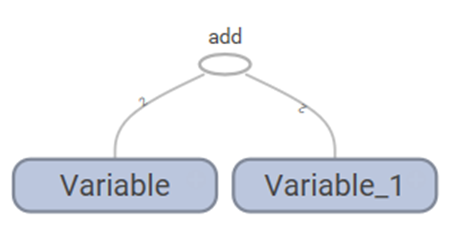</p>
<center>图2 代码对应Graph简略示例图</center>
<a id="graph3"></a>
<p>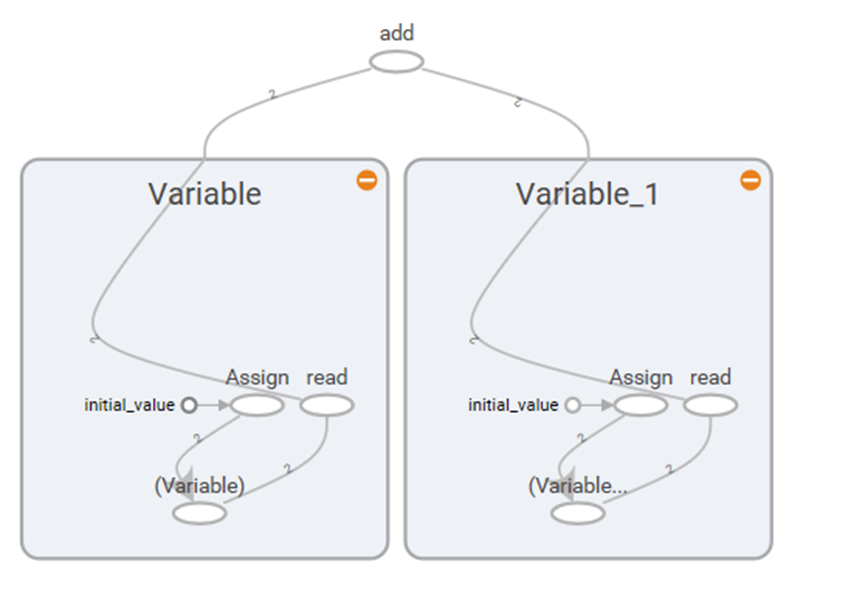</p>
<center>图3 代码对应Graph详细示例图</center>

### 4.2 运行阶段

<p style="text-indent:2em">构建完成计算图之后，要想获取Tensor值，必须进入到执行阶段，在这个阶段我们需要掌握Session概念和执行操作。</p>

#### 4.2.1 Session(会话)

<p style="text-indent:2em">TensorFlow 中涉及的运算都会放在图中，而图的运行只发生在会话（session）中。开启会话后，就可以用数据去填充节点，通过命令执行运算；一旦关闭会话后，就不能进行计算了。因此，会话提供了操作运行和Tensor 求值的环境。</p>

输入下一段代码后，观察其运行结果，获取到的是Tensor对象值，而不再是Tensor对象

In [5]:
sess = tf.Session()
value1 = sess.run(hello)
print("Constant Tensor output:", value1)
sess.close()

Constant Tensor output: b'Hello World!'


##### (1) tf.Session()构造函数

<p style="text-indent:2em">TensorFlow 使用 tf.Session 类来表示客户端程序（通常为 Python 程序，但也提供了其他语言的类似接口）与 C++ 运行时之间的连接。tf.Session 对象使我们能够访问本地机器中的设备和使用分布式 TensorFlow 运行时的远程设备。它还可缓存关于 tf.Graph 的信息，将Graph的op 分发到如CPU 或GPU 之类的设备(Devices()) 上, 同时提供执行op 的方法，使其能够多次高效地运行同一计算。</p>
<p style="text-indent:2em">函数原型：</p>
<p style="text-indent:2em">
<code>__init__(
      target='',
      graph=None,
      config=None
    )</code></p>
<p style="text-indent:2em">tf.Session.init 接受三个可选参数：</p>

* target。如果将此参数留空（默认设置），会话将仅使用本地机器中的设备。对于分布式TensorFlow程序该参数才有意义，该部分超出了本课程的学习范围，有兴趣的同学可以自学。
* graph。默认情况下，新的 tf.Session 将绑定到当前的默认图，并且仅能够在当前的默认图中运行操作。如果您在程序中使用了多个Graph，则可以在构建会话时指定明确的 tf.Graph。
* config。此参数允许您指定一个控制会话行为的 tf.ConfigProto。例如，部分配置选项包括：
<p style="text-indent:2em;"><p style="text-indent:2em;">allow_soft_placement。将此参数设置为 True 可启用“软”设备放置算法，该算法会忽略尝试将仅限 CPU 的操作分配到 GPU 设备上的 tf.device 注解，并将这些操作放置到 CPU 上。</p></p>
<p style="text-indent:2em;"><p style="text-indent:2em;">graph_options.optimizer_options。在执行图之前使您能够控制 TensorFlow 对图实施的优化。</p></p>
<p style="text-indent:2em;"><p style="text-indent:2em;">gpu_options.allow_growth。将此参数设置为 True 可更改 GPU 内存分配器，使该分配器逐渐增加分配的内存量，而不是在启动时分配掉大多数内存。</p></p>
<p style="text-indent:2em;"><p style="text-indent:2em;">gpu_options.per_process_gpu_memory_fraction。此参数为区间(0，1]的值，表示每一次执行GPU内存的占用百分比，默认值为1。</p></p>


<p style="text-indent:2em">Session函数中如果没有传入参数，表明当前代码将会依附于（如果还没有创建会话，则会创建新的会话）默认的本地会话。除了此函数，还有其他方法可以启动会话，我们将在后续实验<span style="color:red">？</span>中陆续进行介绍。</p>

#####  (2) tf.Session.run() 方法

<p style="text-indent:2em">该方法是运行 tf.Operation 或评估 tf.Tensor 的主要机制，直白的说，就是执行Operation、获取Tensor值的必须操作。您可以将一个或多个 tf.Operation 或 tf.Tensor 对象传递到 tf.Session.run，TensorFlow 将根据其依赖关系，分发到C++运行时中执行计算结果所需的所有操作，如果run方法中传递的是最终输出Tensor引用的函数，或者Tensor对象本身，则获取对应Tensor引用的值，在Python 语言中, 将返回numpy的ndarray 对象。如果传递是Operation则执行相关操作，获取结果为None。但是此方法不是唯一方法，与启动会话的方式相关，在后续实验<span style="color:red">？</span>中对此进行介绍。</p>
<p style="text-indent:2em">函数原型：</p>
<p style="text-indent:2em"><code>run(
    fetches,
    feed_dict=None,
    options=None,
    run_metadata=None
    )</code>
<p style="text-indent:2em">fetches即想要运行或评估的对象，可以是单个对象，也可以是一组list结构对象，对象可以是tf.Operation、tf.Tensor 、类张量类型或者对象在Graph中的名字，即可以同时获取一批对象。feed_dict会在实验<span style="color:red">？</span>进行介绍</p>


##### (3) 类张量类型




<p style="text-indent:2em">许多 TensorFlow 操作都会接受一个或多个 tf.Tensor 对象作为参数。例如，tf.matmul 接受两个 tf.Tensor 对象，tf.add_n 接受一个具有 n 个 tf.Tensor 对象的列表。为了方便起见，这些函数将接受类张量对象来取代 tf.Tensor，并将其自动转换为 tf.Tensor（利用 tf.convert_to_tensor 方法）。类张量对象包括以下类型的元素：</p>
<ul>
<li>tf.Tensor</li>
<li>tf.Variable</li>
<li>numpy.ndarray</li>
<li>list（以及类似于张量的对象的列表）</li>
<li>标量 Python 类型：bool、float、int、str</li>
    </ul>

##### (4) tf.Session.close()方法

<p style="text-indent:2em">用于关闭整个Session，只是释放运行所需设备，对构建阶段所产生的Graph等对象并不产生影响，因此可以再次创建Session执行。该方法是个无参函数。</p>
<p style="text-indent:2em">输入下列语句,观察输出结果</p>


In [20]:
sess = tf.Session()
a,b,c1,c2 = sess.run([val_a, val_b, val_c1,val_c2])
print("the value of val_a:",a)
print("the value of val_b:",b)
print("the value of val_c1:",c1)
print("the value of val_c2:",c2)
sess.close()

the value of val_a: [[1 2 3]
 [4 5 6]]
the value of val_b: [[1 1 1]
 [2 2 2]]
the value of val_c1: [[2 3 4]
 [6 7 8]]
the value of val_c2: [[2 3 4]
 [6 7 8]]


<p style="text-indent:2em">该部分代码正常运行，val_a, val_b, val_c1和val_c2这四个对象是在上面构建阶段创建的对象，既然本代码能够正确执行，说明在第一次session关闭后，该部分对象仍然存在，对应的Graph也没有任何变化。并且应该注意到，可以同时运行获取多个对象值。</p>

#### 4.2.2 变量初始化

<p style="text-indent:2em">上面的执行阶段的输出结果都是Constant Tensor对象所存储的值，因此直接在sess中引用该对象，就可以实现数据填充操作，并通过tf.Session.run()方法获取该值。对于Variable对象，根据图3(#graph3)所示，其相关操作比较复杂，必须要进行初始化操作，才能实现数据的初始化值填充。</p>

输入以下语句，查看运行结果

In [3]:
sess = tf.Session()
init = tf.variables_initializer([var_a,var_b])
print("the output of Operation Object:",init)
print("operations after initializer:",tf.get_default_graph().get_operations())
sess.run(init)
a, b = sess.run([var_a,var_b])
print("Variable Tensor output:", a, b)
print("the result of Add op:", sess.run(var_c))
sess.close()

the output of Operation Object: name: "init"
op: "NoOp"
input: "^Variable/Assign"
input: "^Variable_1/Assign"

operations after initializer: [<tf.Operation 'Variable/initial_value' type=Const>, <tf.Operation 'Variable' type=VariableV2>, <tf.Operation 'Variable/Assign' type=Assign>, <tf.Operation 'Variable/read' type=Identity>, <tf.Operation 'Variable_1/initial_value' type=Const>, <tf.Operation 'Variable_1' type=VariableV2>, <tf.Operation 'Variable_1/Assign' type=Assign>, <tf.Operation 'Variable_1/read' type=Identity>, <tf.Operation 'Add' type=Add>, <tf.Operation 'init' type=NoOp>]
Variable Tensor output: [1 2] [3 4]
the result of Add op: [4 6]


##### tf.variables_initializer函数

<p style="text-indent:2em">函数原型：</p>
<p style="text-indent:2em"><code>tf.initialize_variables(
    var_list,
    name='init'
    )</code><p>
<p style="text-indent:2em">与Tensor对象不一样，Variable对象必须要经过初始化语句才能把值赋值到对应应用位置，该函数是其中一种初始化方法，第一个参数是需要初始化的Variable对象的列表，第二个参数是初始化操作op的名字。</p>
<p style="text-indent:2em">除了这种方法，还有其他方法我们将在后续的课程中进行介绍。</p>


### 4.3 Tensor数据基本运算

#### (1) 构建阶段

In [7]:
value3 = tf.Variable([1, 2])
value4= tf.Variable([3, 4])
c = value3 + value4
d = value3 * value4
e = value3 ** value4
print(value3, value4, c, d, e)

<tf.Variable 'Variable:0' shape=(2,) dtype=int32_ref> <tf.Variable 'Variable_1:0' shape=(2,) dtype=int32_ref> Tensor("add_1:0", shape=(2,), dtype=int32) Tensor("mul:0", shape=(2,), dtype=int32) Tensor("pow:0", shape=(2,), dtype=int32)


#### (2) 执行阶段

In [8]:
sess= tf.Session()
init = tf.variables_initializer([value3, value4])
sess.run(init)
print(sess.run([value3, value4, c, d, e]))

[array([1, 2]), array([3, 4]), array([4, 6]), array([3, 8]), array([ 1, 16])]


#### (3) 数据类型一致性问题

<p style="text-indent:2em">运算时，注意Tensor的数据类型要保持一致</p>
输入下面代码，查看运行结果：

In [9]:
a = tf.constant([1,2],name="a")
b = tf.constant([2.0,3.0],name="b")
result=a + b
print(sess.run([result]))
sess.close()

ValueError: Tensor conversion requested dtype int32 for Tensor with dtype float32: 'Tensor("b:0", shape=(2,), dtype=float32)'

<p style="text-indent:2em">这时候会需要数据类型转换：</p>
<p style="text-indent:2em">数据类型转换函数原型：</p>
<p style="text-indent:2em"><code>tf.cast(
    x,
    dtype,
    name=None
    )</code></p>
<p style="text-indent:2em">x为待转换Tensor，dtype为转换后的类型，name为对应op命名</p>
<p style="text-indent:2em">将上面的源代码修改为</p>

In [10]:
a = tf.constant([1,2],name="a")
b = tf.constant([2.0,3.0],name="b")
result =  tf.cast(a, tf.float32) + b
print(sess.run([result]))
sess.close()

[array([3., 5.], dtype=float32)]


### 4.4 神经元模型

#### （1）构建阶段

In [16]:
#输入信号
x = tf.constant([[0.1, 0.2]])
#可修改的权重及偏置量参数，因为在神经网络中这部分数据即是想要最终所求的结果，因此在运算过程中会重复对其优化，因此必须利用Variable对象对其引用，但是在这里可以也用constant对象。
w = tf.Variable([[0.3], [0.4]])
b = tf.Variable([0.1])
#神经元输出
s = tf.add(tf.matmul(x, w), b)
#两个激励函数（传递函数），sigmoid和tanh函数，注意，正式搭建神经网络时，激励函数每次输出只有唯一的一个，这里只是为了对比
nnsigmod = tf.sigmoid(s)
nntanh = tf.tanh(s)
print(x,w,b,s)
print(nnsigmod, nntanh)

Tensor("Const_4:0", shape=(1, 2), dtype=float32) <tf.Variable 'Variable_4:0' shape=(2, 1) dtype=float32_ref> <tf.Variable 'Variable_5:0' shape=(1,) dtype=float32_ref> Tensor("Add_2:0", shape=(1, 1), dtype=float32)
Tensor("Sigmoid_1:0", shape=(1, 1), dtype=float32) Tensor("Tanh_1:0", shape=(1, 1), dtype=float32)


#### （2）执行阶段


In [19]:
sess=tf.Session()
init = tf.variables_initializer([w, b])
sess.run(init)
sigmodval,tanhval=sess.run([nnsigmod, nntanh])
print(sigmodval,tanhval)
sess.close()

[[0.5523079]] [[0.20696649]]
